In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
max_len = 500  # cut texts after this number of words (among top max_features most common words)

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Using TensorFlow backend.


Loading data...
17465344/17464789 [==============================] - 2s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [4]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPool1D, GlobalMaxPool1D, Dense
from keras.optimizers import RMSprop

model = Sequential()
model.add(Embedding(max_features, 128, input_length=max_len))
model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPool1D(5))
model.add(GlobalMaxPool1D())
model.add(Dense(1))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,308,737
Trainable params: 1,308,737
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer=RMSprop(lr=1e-4),
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 8s 387us/step - loss: 0.7081 - acc: 0.5358 - val_loss: 0.6784 - val_acc: 0.5934
Epoch 2/10
20000/20000 [==============================] - 4s 184us/step - loss: 0.6522 - acc: 0.6932 - val_loss: 0.6495 - val_acc: 0.6800
Epoch 3/10
20000/20000 [==============================] - 4s 183us/step - loss: 0.6022 - acc: 0.7885 - val_loss: 0.6019 - val_acc: 0.7352
Epoch 4/10
20000/20000 [==============================] - 4s 181us/step - loss: 0.5353 - acc: 0.8153 - val_loss: 0.5365 - val_acc: 0.7748
Epoch 5/10
20000/20000 [==============================] - 4s 181us/step - loss: 0.4664 - acc: 0.8258 - val_loss: 0.4938 - val_acc: 0.7892
Epoch 6/10
20000/20000 [==============================] - 4s 180us/step - loss: 0.4148 - acc: 0.8363 - val_loss: 0.4645 - val_acc: 0.8024
Epoch 7/10
20000/20000 [==============================] - 4s 185us/step - loss: 0.3744 - acc: 0.8539 - val_loss: 0.4386 - v

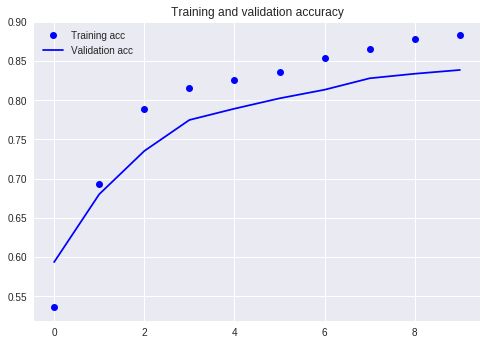

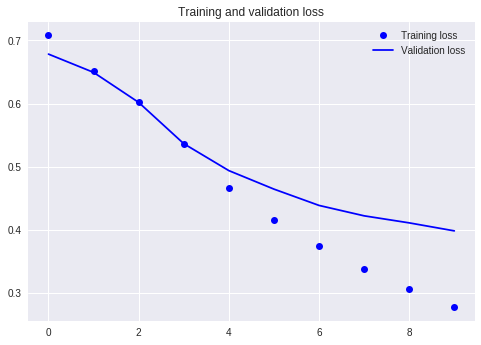

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()